# 手寫辨識

## 取得mnist資料集

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28x28 bit maop of hand-written digits 0~9

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  #x is input image, y is output lable 0~9

### trainning data

In [3]:
x_train.shape  #60000 train images

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
len(y_train) 

60000

### testing data

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
len(y_test)

10000

## plot the training images

### x 正歸化前

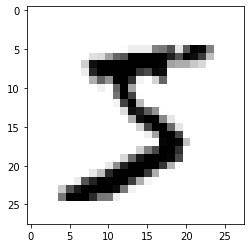

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)  #shows the 1st trainng images
plt.show()
print(x_train[0])  #its a 28x28x255 tensor

### x 正歸化後

In [22]:
x_train_normalized = tf.keras.utils.normalize(x_train, axis=1)  #0~255 -> 0~1
x_test_normalized = tf.keras.utils.normalize(x_test, axis=1)

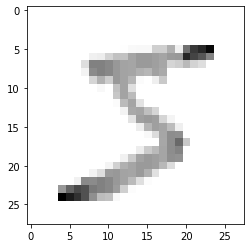

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
plt.imshow(x_train_normalized[0], cmap = plt.cm.binary)  #shows the 1st trainng images
plt.show()
print(x_train_normalized[0])  

## 建立訓練NN

In [14]:
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Flatten())  #make input layer like a sigle input vector(1 column)
network.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  #128 nurons for 1st hidden layers
network.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  #128 nurons for 2nd hidden layers
network.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #10 for the # of classificatoins(lables 0~9)

network.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [15]:
network.fit(x_train_normalized, y_train, epochs=3) #trainning the modle. epoch is the # of full-pass(see all the images)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2611 - accuracy: 0.9231
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1039 - accuracy: 0.9680
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0714 - accuracy: 0.9773


### check for loss and accuracy

In [16]:
val_loss, val_acc = network.evaluate(x_train_normalized, y_train)
print(val_loss, val_acc)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0481 - accuracy: 0.9856
0.048142239451408386 0.9855999946594238


### to save our model

In [18]:
network.save('Handwritting_reader')

INFO:tensorflow:Assets written to: Handwritting_reader\assets


In [20]:
new_network = tf.keras.models.load_model('Handwritting_reader')

## Testing our model

In [24]:
predictions = new_network.predict([x_test_normalized])
print(predictions[0])

[1.2085177e-09 1.6119402e-07 5.3285856e-07 2.4392764e-05 2.0437478e-09
 1.6572894e-08 4.2562419e-15 9.9997270e-01 1.6462939e-08 2.3033685e-06]


## to read this out

In [28]:
import numpy as np
print(np.argmax(predictions[0]))

7


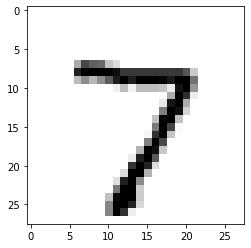

In [30]:
plt.imshow(x_test[0], cmap = plt.cm.binary) 
plt.show()

### It is 7!!!